In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from audioldm import build_model
import torch

# ckpt = torch.load("audioldm_epoch_9.pt")
model = build_model(ckpt_path="saved_models/audioldm_epoch_1.pt",state_dict="audioldm_state_dict")

Load AudioLDM: %s audioldm-s-full
{'target': 'audioldm.latent_diffusion.openaimodel.UNetModel', 'params': {'image_size': 64, 'extra_film_condition_dim': 512, 'extra_film_use_concat': True, 'in_channels': 8, 'out_channels': 8, 'model_channels': 128, 'attention_resolutions': [8, 4, 2], 'num_res_blocks': 2, 'channel_mult': [1, 2, 3, 5], 'num_head_channels': 32, 'use_spatial_transformer': True}}
audioldm.latent_diffusion.openaimodel.UNetModel
DiffusionWrapper has 185.04 M params.
audioldm.variational_autoencoder.autoencoder.AutoencoderKL
audioldm.clap.encoders.CLAPAudioEmbeddingClassifierFreev2


c:\Users\3924s\AppData\Local\Programs\Python\Python310\lib\site-packages\torchlibrosa\stft.py:193: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = librosa.util.pad_center(fft_window, n_fft)
c:\Users\3924s\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another 

In [3]:
from audioldm.pipeline import text_to_audio
import IPython.display as ipd
import numpy as np

In [4]:
def generate_audio(text,angle):
    text_l = f"LEFT-{angle:03d}-{text}"
    text_r = f"RIGHT-{(360-angle):03d}-{text}"
    waveform_l = text_to_audio(
        model,
        text_l,
    )
    waveform_r = text_to_audio(
        model,
        text_r,
    )
    waveform = waveform_l.squeeze()
    waveform_2 = waveform_r.squeeze()
    bin_mix = np.vstack((waveform,waveform_2))
    return bin_mix, waveform, waveform_2

In [7]:
torch.cuda.empty_cache()

In [6]:
del model

In [5]:
text = "A man is speaking in a studio"
angle = 180
bin_mix,l_audio,r_audio = generate_audio(text,angle)
ipd.Audio(bin_mix, rate=16000)

Generate audio using text LEFT-180-A man is speaking in a studio


DDIM Sampler: 100%|██████████| 200/200 [00:32<00:00,  6.15it/s]
c:\Users\3924s\AppData\Local\Programs\Python\Python310\lib\site-packages\torchaudio\transforms\_transforms.py:611: UserWarning: Argument 'onesided' has been deprecated and has no influence on the behavior of this module.
  warnings.warn(
c:\Users\3924s\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to wei

Generate audio using text RIGHT-180-A man is speaking in a studio


DDIM Sampler: 100%|██████████| 200/200 [00:30<00:00,  6.56it/s]


In [66]:
ipd.Audio(l_audio, rate=16000)

In [67]:
ipd.Audio(r_audio, rate=16000)

In [62]:
import torchaudio
torchaudio.save("example_sounds/mix_dog_barking.wav",torch.tensor(bin_mix),16000)
torchaudio.save("example_sounds/left_dog_barking.wav",torch.tensor(l_audio).unsqueeze(0),16000)
torchaudio.save("example_sounds/right_dog_barking.wav",torch.tensor(r_audio).unsqueeze(0),16000)

In [19]:

import torchaudio
l_audio = torchaudio.load("example_sounds/left_metal.wav")[0].squeeze()

In [21]:
import IPython.display as ipd
ipd.Audio(l_audio, rate=16000)

In [24]:
mix_audio = torchaudio.load("example_sounds/mix.wav")[0].squeeze()

In [25]:
ipd.Audio(mix_audio, rate=16000)

Text(0.5, 0.98, 'Mel-frequency spectrogram')

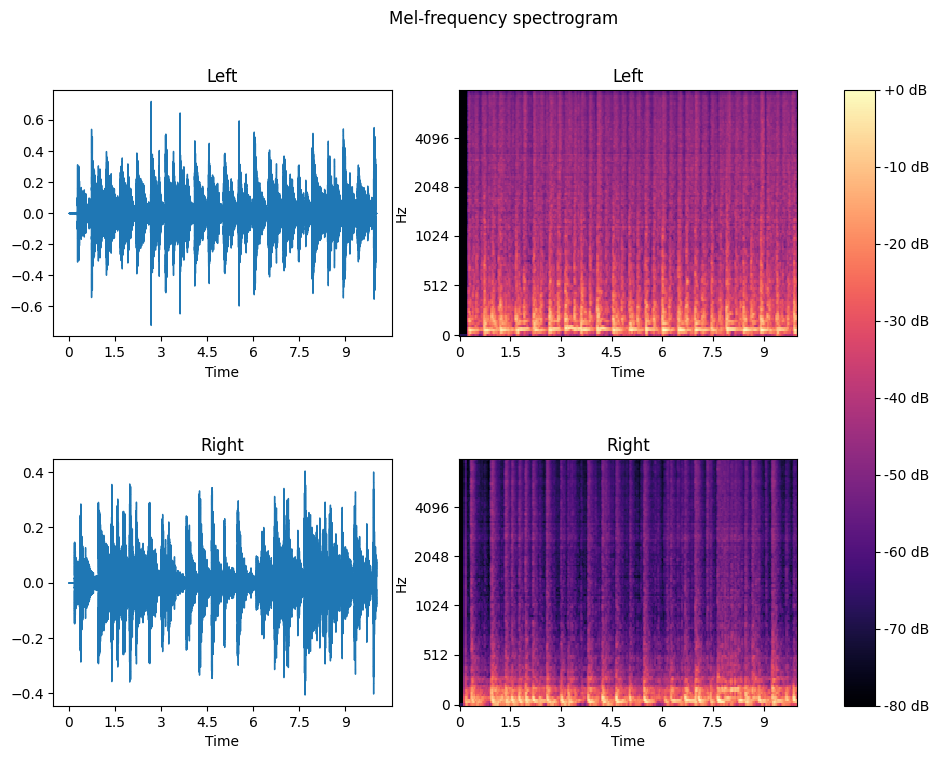

In [21]:
import librosa
import numpy as np
import librosa.display
y_l, sr_l = librosa.load('example_sounds/left_drums.wav', sr=16000,duration=10.0)
S_l = librosa.feature.melspectrogram(y=y_l, sr=sr_l, n_mels=128,fmax=8000)

y_r, sr_r = librosa.load('example_sounds/right_drums.wav', sr=16000,duration=10.0)
S_r = librosa.feature.melspectrogram(y=y_r, sr=sr_r, n_mels=128,fmax=8000)

# y_m, sr_m = librosa.load('example_sounds/mix_metal.wav', sr=16000,duration=10.0)
# S_m = librosa.feature.melspectrogram(y=y_m, sr=sr_m, n_mels=128,fmax=8000)

import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,2,figsize=(12, 8))
Sl_dB = librosa.power_to_db(S_l, ref=np.max)
img_l = librosa.display.specshow(Sl_dB, x_axis='time',y_axis='mel', sr=sr_l,fmax=8000, ax=ax[0,1])
S_r_dB = librosa.power_to_db(S_r, ref=np.max)
img_r = librosa.display.specshow(S_r_dB, x_axis='time',y_axis='mel', sr=sr_r,fmax=8000, ax=ax[1,1])
librosa.display.waveshow(y_l, sr=sr_l,ax=ax[0,0])
librosa.display.waveshow(y_r, sr=sr_r,ax=ax[1,0])
# S_m_dB = librosa.power_to_db(S_m, ref=np.max)
# img_m = librosa.display.specshow(S_m_dB, x_axis='time',y_axis='mel', sr=sr_r,fmax=8000, ax=ax[2])
plt.subplots_adjust(hspace=.5)
[i.set(title='Left') for i in ax[0]]
[i.set(title='Right') for i in ax[1]]
# ax[0].set(title='Left')
# ax[1].set(title='Right')
fig.colorbar(img_l, ax=ax, format='%+2.0f dB')
plt.suptitle('Mel-frequency spectrogram')

Text(0.5, 0.98, 'Waveform')

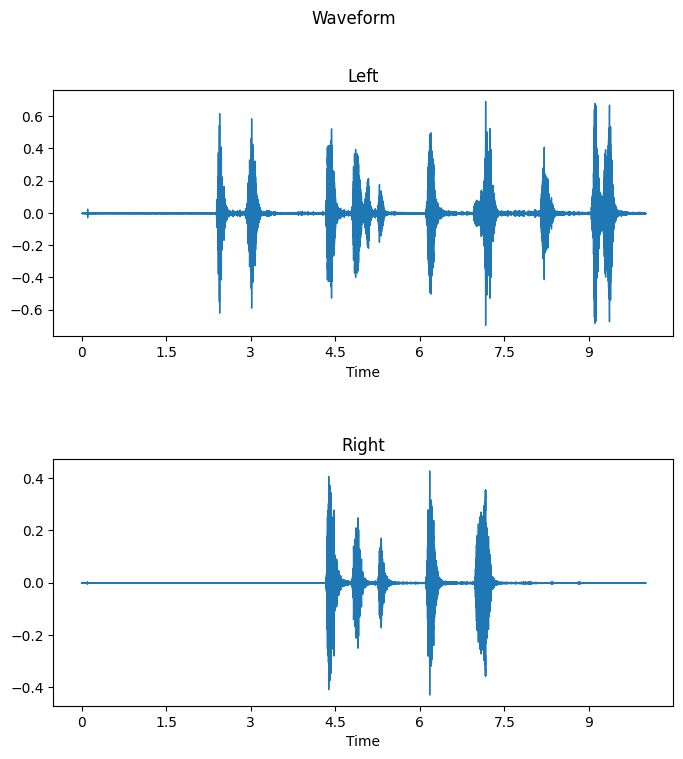

In [12]:
fig,ax = plt.subplots(2,1,figsize=(8, 8))
y_l, sr_l = librosa.load('example_sounds/left_dog_barking.wav', sr=16000,duration=10.0)
y_r, sr_r = librosa.load('example_sounds/right_dog_barking.wav', sr=16000,duration=10.0)
# y_m, sr_m = librosa.load('example_sounds/mix_dog_barking.wav', sr=16000,duration=10.0)
librosa.display.waveshow(y_l, sr=sr_l,ax=ax[0])
librosa.display.waveshow(y_r, sr=sr_r,ax=ax[1])
# librosa.display.waveshow(y_m, sr=sr_m,ax=ax[2])
# increase distance between subplots
plt.subplots_adjust(hspace=.5)
ax[0].set(title='Left')
ax[1].set(title='Right')
# ax[2].set(title='Mix')
plt.suptitle('Waveform')

Text(0.5, 0.98, 'Waveform')

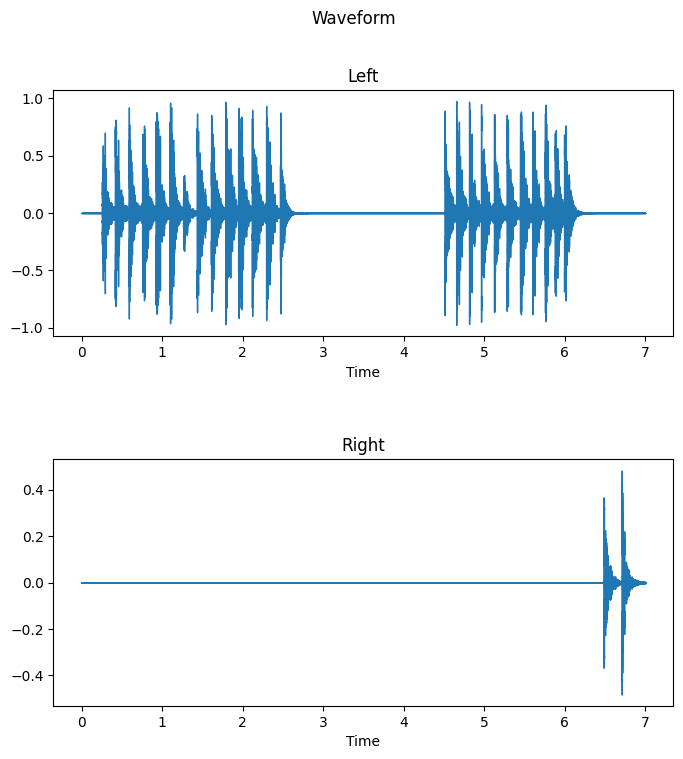

In [36]:
fig,ax = plt.subplots(2,1,figsize=(8, 8))
y_l, sr_l = librosa.load('example_sounds/left.wav', sr=16000,duration=7.0)
y_r, sr_r = librosa.load('example_sounds/right.wav', sr=16000,duration=7.0)
# y_m, sr_m = librosa.load('example_sounds/mix.wav', sr=16000,duration=5.0)
librosa.display.waveshow(y_l, sr=sr_l,ax=ax[0])
librosa.display.waveshow(y_r, sr=sr_r,ax=ax[1])
# librosa.display.waveshow(y_m, sr=sr_m,ax=ax[2])
# increase distance between subplots
plt.subplots_adjust(hspace=.5)
ax[0].set(title='Left')
ax[1].set(title='Right')
# ax[2].set(title='Mix')
plt.suptitle('Waveform')

In [28]:
import pickle

llist = pickle.load(open("loss_list.pkl","rb"))

In [34]:
llist = list(map(lambda x: x.cpu().numpy(), llist))

In [36]:
len(llist)

1500

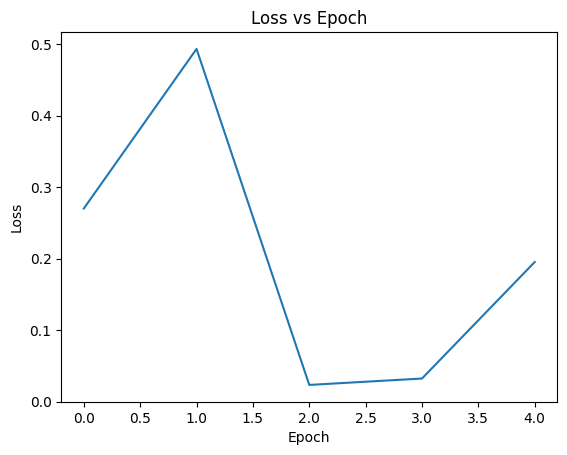

In [44]:
plt.plot(llist[::300])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()